In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)


In [3]:
print(train.data[5])


From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)
labels = model.predict(test.data)


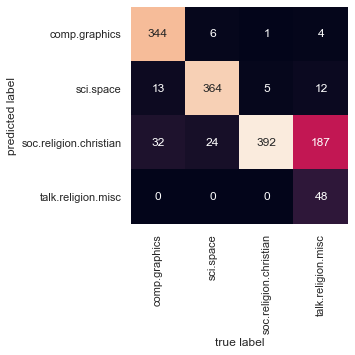

In [8]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');


In [10]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]


In [11]:
predict_category('sending a payload to the ISS')


'sci.space'

In [19]:
predict_category('islam')


'soc.religion.christian'

In [15]:
# Get the feature names from the TfidfVectorizer
feature_names = model.named_steps['tfidfvectorizer'].get_feature_names_out()

# Transform the documents into a TF-IDF matrix
tfidf_matrix = model.named_steps['tfidfvectorizer'].transform(train.data)

# Sum the TF-IDF values across documents for each feature to get total frequencies
total_frequencies = tfidf_matrix.sum(axis=0)

# Get the total frequencies as a numpy array
total_frequencies_array = total_frequencies.A1

# Create a dictionary with feature names and their frequencies
word_frequencies = dict(zip(feature_names, total_frequencies_array))

# Sort the dictionary by frequencies in descending order
sorted_word_frequencies = dict(sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True))

# Print the top N words and their frequencies
top_n = 20
for word, frequency in list(sorted_word_frequencies.items())[:top_n]:
    print(f"{word}: {frequency}")


the: 258.23977965020015
of: 149.06667431252708
to: 147.10266031866982
and: 115.38100229045875
is: 103.77926930404253
that: 102.46638402328003
in: 101.48402109651629
it: 80.31443139486012
you: 75.25693554409193
edu: 65.90030294312324
for: 64.83736720700762
this: 56.83334465823134
be: 56.30297719729671
not: 56.28124843817911
are: 54.01314421706305
on: 50.37784571040879
from: 50.0590524810858
as: 49.69034604772149
have: 49.44203552411085
was: 45.88325305049806
